In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

In [2]:
# Loading dataset
wine = pd.read_csv('winequality-red.csv', delimiter = ';')

In [3]:
# Let's see how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Let's see some basic statistical information about the coulmns
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Number of unique values in each column
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

## Data Visualization to know how the data columns are distributed in the dataset

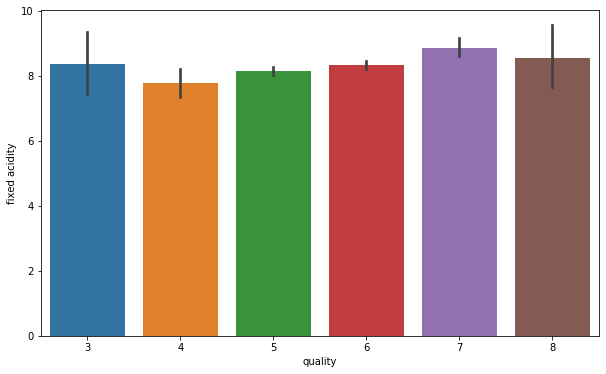

In [7]:
# Fixed acidity does not give any specification to classify the quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

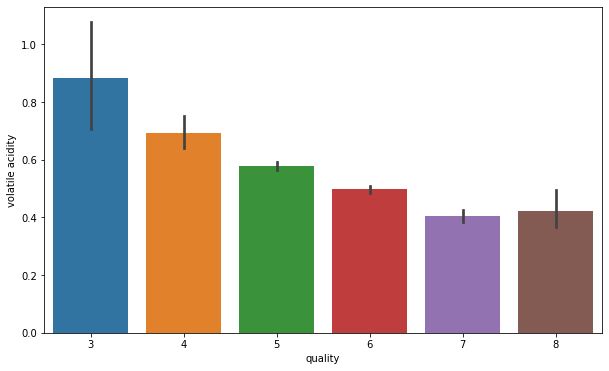

In [8]:
# We see a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

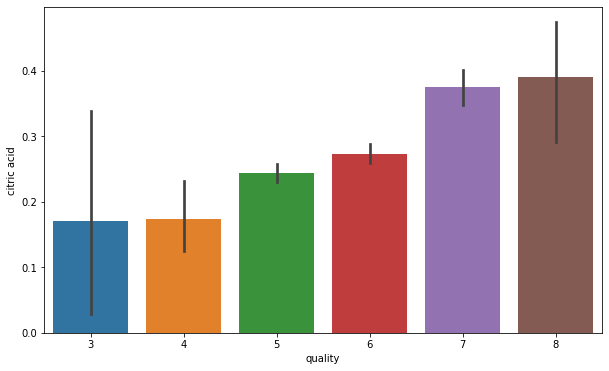

In [9]:
# Composition of citric acid increases as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

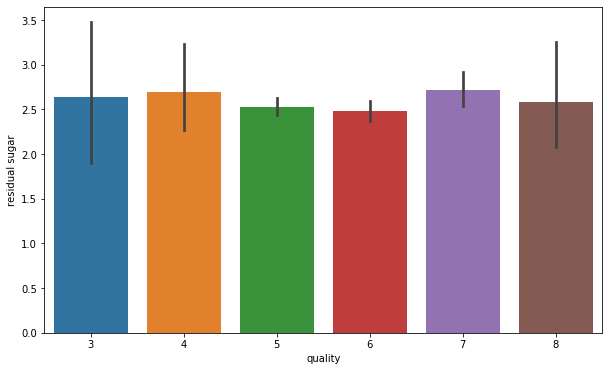

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

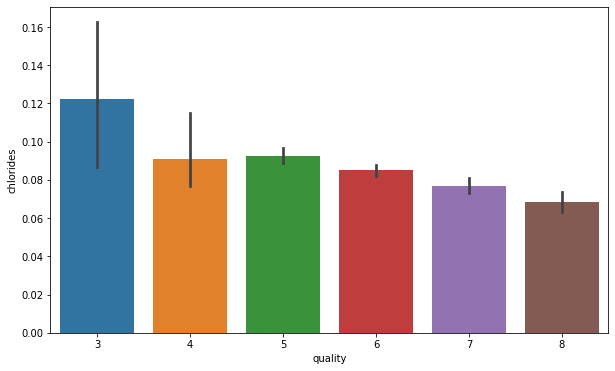

In [11]:
# Composition of chloride decreases as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

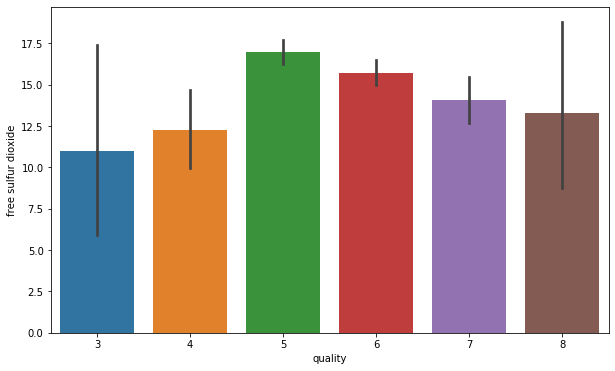

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

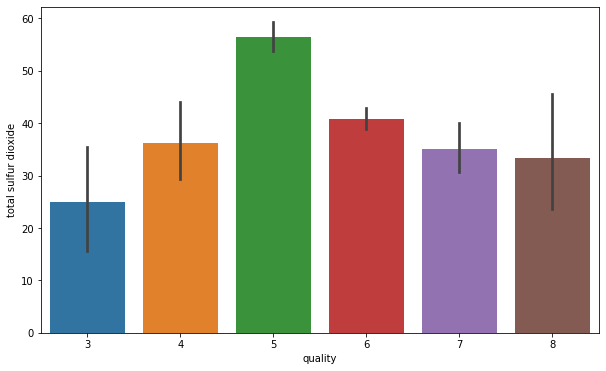

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

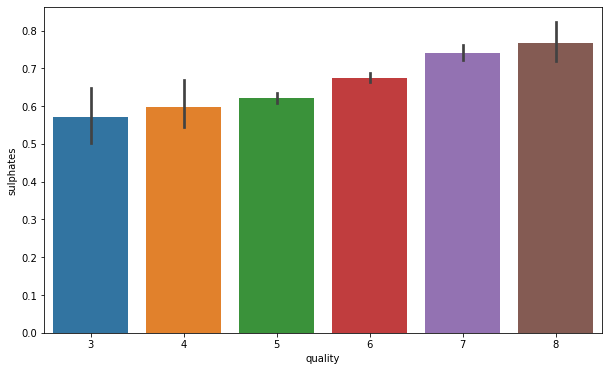

In [14]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

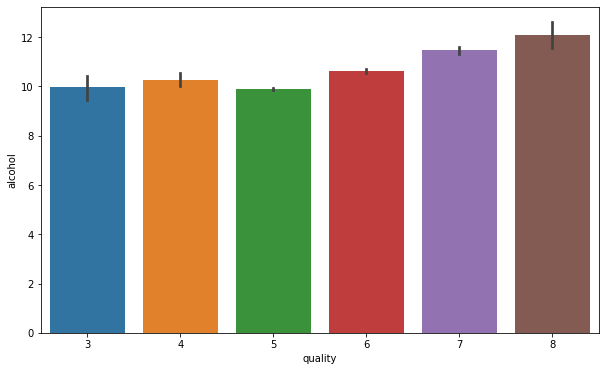

In [15]:
# Alcohol level goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing Data

In [16]:
# Making binary classification for the response variable
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [17]:
# lets assign labels to our quality variable
label_quality = LabelEncoder()

In [18]:
# Good becomes 1 and bad becomes 0
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [19]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

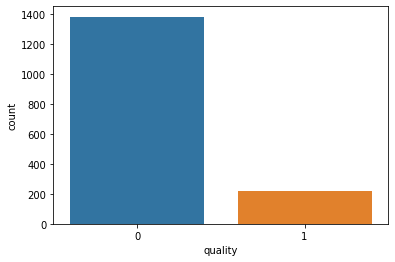

In [20]:
sns.countplot(wine['quality'])

In [21]:
# Separating the dataset as response variable and feature variables
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [22]:
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (1119, 11)
y_train shape: (1119,)


In [24]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (480, 11)
y_test shape: (480,)


In [25]:
# Applying Standard scaling to get optimized result
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)

In [28]:
# Let's see how our model performed
print(classification_report(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       413
           1       0.61      0.37      0.46        67

    accuracy                           0.88       480
   macro avg       0.76      0.67      0.70       480
weighted avg       0.86      0.88      0.87       480



###### Random forest gives the accuracy of 87%

In [29]:
# Confusion matrix for random forest classification
print(confusion_matrix(y_test, predict_rfc))

[[397  16]
 [ 42  25]]


### Stochastic Gradient Decent Classifier

In [30]:
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train, y_train)
predict_sgd = sgd.predict(X_test)

In [31]:
print(classification_report(y_test, predict_sgd))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       413
           1       0.50      0.45      0.47        67

    accuracy                           0.86       480
   macro avg       0.71      0.69      0.70       480
weighted avg       0.85      0.86      0.86       480



#### Stochastic Gradient Decent Classifier gives 81% accuracy

In [32]:
print(confusion_matrix(y_test, predict_sgd))

[[383  30]
 [ 37  30]]


### Support Vector Classifier

In [33]:
svc = SVC()
svc.fit(X_train, y_train)
predict_svc = svc.predict(X_test)

In [34]:
print(classification_report(y_test, predict_svc))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       413
           1       0.68      0.28      0.40        67

    accuracy                           0.88       480
   macro avg       0.79      0.63      0.67       480
weighted avg       0.86      0.88      0.86       480



#### Support Vector Classifier gives 86% accuracy

## Increase Accuracy of models


### Grid Search CV

In [35]:
# Finding best parameters for our SVC model
param = {
    'C' : [0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4]
}

grid_svc = GridSearchCV(svc, param_grid = param, scoring = 'accuracy', cv = 10)

In [36]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [37]:
# Best parameters for our svc model 
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.9, 'kernel': 'rbf'}

In [38]:
# Let's run this again with the best parameters
svc2 = SVC(C = 1.2, gamma = 0.9, kernel = 'rbf')
svc2.fit(X_train, y_train)
predict_svc2 = svc2.predict(X_test)

In [39]:
print(classification_report(y_test, predict_svc2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       413
           1       0.77      0.36      0.49        67

    accuracy                           0.90       480
   macro avg       0.84      0.67      0.72       480
weighted avg       0.89      0.90      0.88       480



#### SVC improves from 86% to 90% using Grid Search CV

## Cross Validation Score for random forest and SGD

In [40]:
# Let's try to do some evaluation for random forest model using cross validation
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9088722651222652

#### Random forest accuracy increases from 87% to 91 % using cross validation score

In [41]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
